# UTSA CS 3793: Assignment-1

**Palacios - Jayden - (ubc007)**






## Learning Objectives


*   Read data from a file and Create a graph
*   Implement Uninformed & Informed searching strategies
*   Apply different searching strategies for the given problem
*   Analyze and Compare the searching strategies


## Description

This assignment is focused on **python file reading, graph creation** and implementation of **search algorithms**. 
In the following sections, you will complete a series of tasks for a made up problem of *Coronavirus in Texas*.

*   Coronavirus is non-discriminatory, in the sense that it can spread from one city to any other city. The only goal of the virus is to spread to all cities in Texas. Find a possible way for the virus to spread (Uninformed Search).
*   To counter the effect of the virus, vaccine needs to be distributed to all cities. One city has more demand than supply, whereas one city has a shortage of vaccines. The goal is to find an **optimal** strategy to transport the vaccine (Informed Search) from the city with high supply (low demand) to the city with low supply (high demand).

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library for the search algorithms. You can get pieces of code from online, but please cite the source properly.


#Reading Data Files & Creating a 2D Graph

##(45 points)

In this section, you will write code to read the data files provided, cities.csv and distances.csv, and create a 2D graph consisting of nodes and edges. The goal is to use this graph for the 2 search agents that you will create in the next section.

Provided with this lab, on Blackboard, you will find 2 csv files:

*   **cities.csv** - This file contains a list of coordinates for selected cities in Texas, in the following format:
```
San Antonio,29.4685,-98.5254
```
The above line means that San Antonio is located at the latitude and longitude of 29.4685 N and 98.5254 W respectively. Note that the '-ve' sign denotes 'S' for latitude and 'W' for longitude. While performing calculations you will need to ignore the sign.

*   **distances.csv** - This file contains distance values between two cities of Texas, if a path exists, in the following format:
```
San Antonio,New Braunfels,30.80876734
```
The above line denotes that there should be an edge between *San Antonio* and *New Braunfels* and the weight on that edge, i.e. the distance, is *30.80876734*.

In the code blocks below, handle the logic for the graph. Load the graph data from the give files and display a 2D graph of the given data, with labeled nodes and edges. Create as many functions or code blocks as needed.

##Extra Credit (4 points)

Overlay the 2D graph on an image of the Texas state map.





In [1]:
# Add only your imports here
import pandas as pd
import math
import heapq
import matplotlib.pyplot as plt

In [10]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "./Data/"
citiesFile = basePath + "cities.csv"
distancesFile = basePath + "distances.csv"

In [3]:
# Load the graph data from the files
citiesColumns = ["city", "latitude", "longitude"]
distancesColumns = ["city 1", "city 2", "distance"]
cities = pd.read_csv(citiesFile, header=None, names=citiesColumns)
distances = pd.read_csv(distancesFile, header=None, names=distancesColumns)

#create graph
cityGraph = []
for i in range(len(cities)):
    cityGraph.append([0]*len(cities))
for i in range(len(distances)):
    city1 = distances.iloc[i]["city 1"]
    city2 = distances.iloc[i]["city 2"]
    cityGraph[(cities.loc[cities['city'] == city1]).index[0]][(cities.loc[cities['city'] == city2]).index[0]] = distances.iloc[i]["distance"]
    cityGraph[(cities.loc[cities['city'] == city2]).index[0]][(cities.loc[cities['city'] == city1]).index[0]] = distances.iloc[i]["distance"]

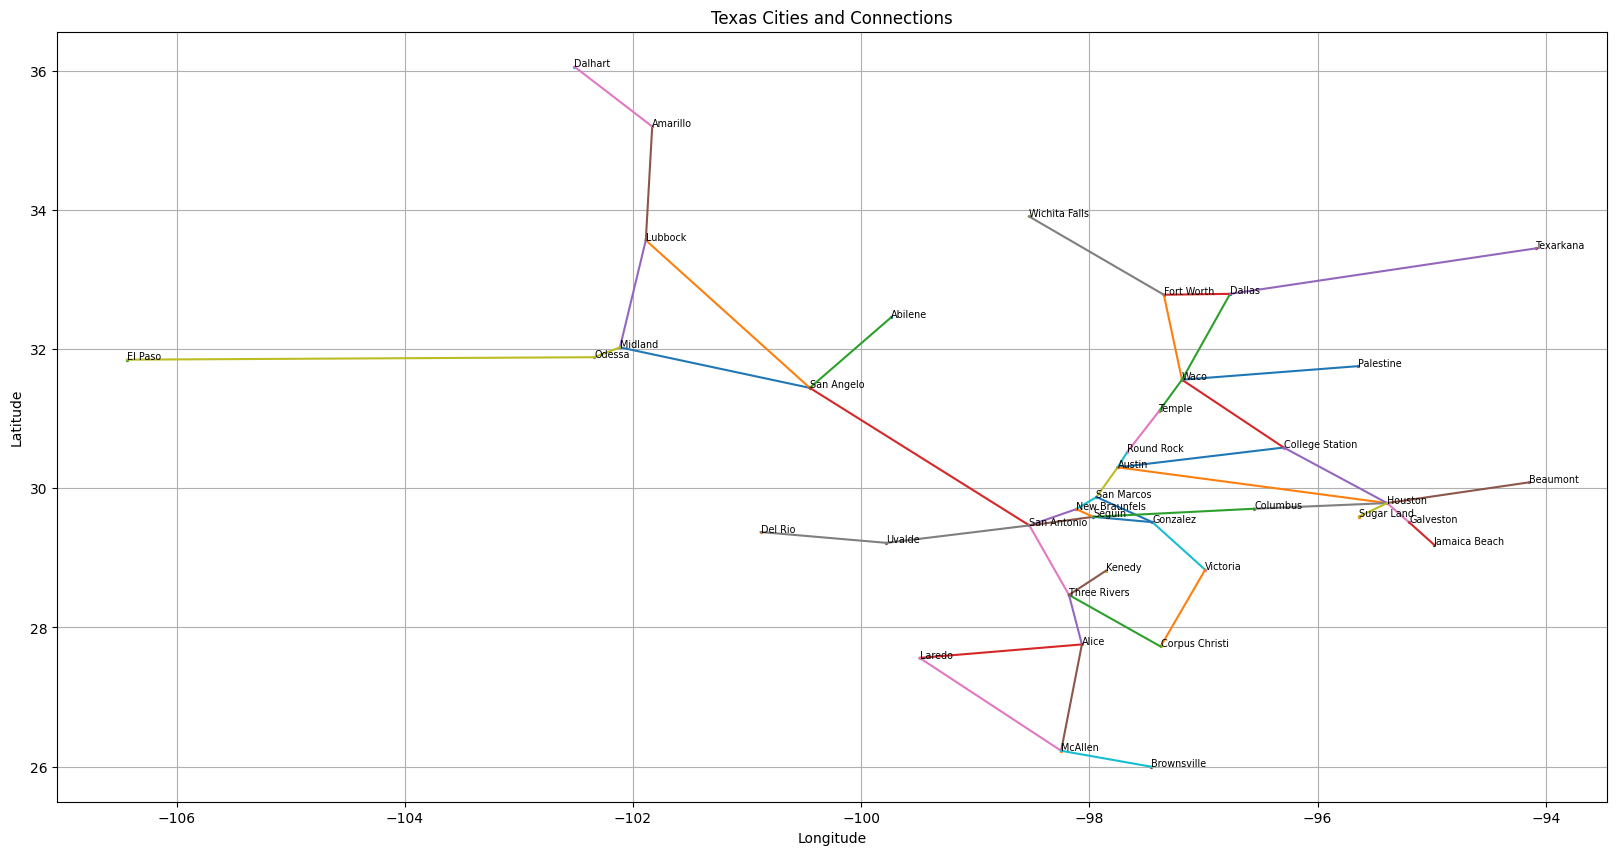

In [4]:
# Display a 2D graph of the given data.
minLat = min(cities["latitude"])
maxLat = max(cities["latitude"])
minLon = min(cities["longitude"])
maxLon = max(cities["longitude"])
latRange = maxLat - minLat
lonRange = maxLon - minLon
aspectRatio = lonRange / latRange
for i in range(len(cities)):
    x = cities.iloc[i]["longitude"]
    y = cities.iloc[i]["latitude"]
    cityName = cities.iloc[i]["city"]
    plt.scatter(x, y, label=cityName, s=2)
    plt.text(x, y, cityName, fontsize='x-small')
for i in range(len(distances)):
    city1 = distances.iloc[i]["city 1"]
    city2 = distances.iloc[i]["city 2"]
    x1 = cities.loc[cities["city"] == city1]["longitude"]
    y1 = cities.loc[cities["city"] == city1]["latitude"]
    x2 = cities.loc[cities["city"] == city2]["longitude"]
    y2 = cities.loc[cities["city"] == city2]["latitude"]
    city1Index = (cities.loc[cities['city'] == city1]).index[0]
    city2Index = (cities.loc[cities['city'] == city2]).index[0]
    plt.plot([x1,x2], [y1,y2])
#     plt.text((x1+x2)/2, (y1+y2)/2, cityGraph[city1Index][city2Index], fontsize='x-small')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Texas Cities and Connections")
plt.grid(True)
plt.gcf().set_size_inches(20, 10)
plt.show()

#Virus Spread - Uninformed Search Agent

##(40 points)

In this section, you will use the graph created in the previous section and create an *uninformed search* agent that will print the path how the virus will spread to all the provided Texas cities. The first confirmed case of the virus was in **Three Rivers** and starts spreading from there. The virus does not discriminate and it needs to spread to all the cities of Texas.

In the following code block, write code to implement **any** uninformed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path or sequence of cities that will be infected by the spread of Coronavirus.
*   The distance travelled by the selected virus spreading strategy.

##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

In [5]:
# Implement ANY uninformed search strategy for the spread of coronavirus from the starting city of 'Three Rivers'
totalDistance = 0
path = []
root = (cities.loc[cities['city'] == "Three Rivers"]).index[0]
visited = [0]*len(cities)
visited[root] = 1
searchQueue = []
frontPntr = 0
searchQueue.append(root)
count = 0

#perfrom a BFS on the graph (uinformed search)
while(frontPntr < len(searchQueue)):
    root = searchQueue[frontPntr]
    path.append(cities.iloc[root]["city"] + " -> ")
    for i in range(len(cities)):
        if cityGraph[root][i] > 0 and visited[i] == 0:
            searchQueue.append(i)
            totalDistance+=cityGraph[root][i]
            visited[i] = 1
    frontPntr += 1
    
#get path and join it into one string
path.append("All cities infected.")
print(''.join(path))
print("Total Path Distance: %.3f miles" % (totalDistance))

Three Rivers -> Alice -> Corpus Christi -> Kenedy -> San Antonio -> Laredo -> McAllen -> Victoria -> New Braunfels -> San Angelo -> Seguin -> Uvalde -> Brownsville -> Gonzalez -> San Marcos -> Abilene -> Lubbock -> Midland -> Columbus -> Del Rio -> Austin -> Amarillo -> Odessa -> Houston -> College Station -> Round Rock -> Dalhart -> El Paso -> Beaumont -> Galveston -> Sugar Land -> Waco -> Temple -> Jamaica Beach -> Dallas -> Fort Worth -> Palestine -> Texarkana -> Wichita Falls -> All cities infected.
Total Path Distance: 3381.269 miles


#Vaccine Transportation - Informed Search Agent

##(40 points)

In this section, you will create an *informed search* agent that will be used to transport the vaccine. The city of **San Antonio** has more supply of vaccine than the demand. The goal is to create an **optimal strategy** to transport the vaccine and make it available at the highly affected city of **College Station**, where there is a shortage of vaccines.

In the following code block, write code to implement an **optimal** informed search strategy. You are free to create more code blocks if needed. As the output, print 

*   The path / sequence of cities that will be visited in the optimal vaccine transportation strategy.
*   The total distance travelled in the optimal vaccine transportation strategy.


##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

In [6]:
#You need Latitude and Longitude to calculate the distance between two locations with following formula:
#acos(sin(lat1)*sin(lat2)+cos(lat1)*cos(lat2)*cos(lon2-lon1))*6371 (6371 is Earth radius in km.)
def hueristic(lat1, lat2, lon1, lon2):
    lon1 = abs(lon1)
    lon2 = abs(lon2)
    r = 6371
    p = math.pi / 180
    a = 0.5 - math.cos((lat2 - lat1) * p) / 2 + math.cos(lat1 * p) * math.cos(lat2 * p) * (1 - math.cos((lon2 - lon1) * p)) / 2
    a = 2 * r * math.asin(math.sqrt(a))
    return a*0.621371

#MinHeapQueue specified for this assignment, not a general class
class MinHeapQueue:
    
    def __init__(self, cityDF):
        self.pQueue = []
        self.heuristics = []
        self.nodeCosts = {}
        self.totalCosts = {}
        self.previousVerticies = {}
        
        for i in range(len(cities)):
            city1Longitude = cityDF.iloc[i]["longitude"]
            city1Latitude = cityDF.iloc[i]["latitude"]
            collegStationLongitude = cityDF.iloc[6]["longitude"]
            collegStationLatitude = cityDF.iloc[6]["latitude"]
            self.heuristics.append(hueristic(city1Latitude, collegStationLatitude, city1Longitude, collegStationLongitude))
    
    #returns smallest element in heap
    def extractMin(self):
        min = self.pQueue[0]
        root = self.pQueue[len(self.pQueue) - 1]
        self.pQueue.pop(len(self.pQueue) - 1)
        if len(self.pQueue) > 0:
            self.pQueue[0] = root
            self.heapify(0)
        return min
        
    #takes a root node and turns the tree into a valid heap
    def heapify(self, ind):
        smaller = ind
        left = ind*2
        right = ind*2 + 1
        if left < len(self.pQueue) and self.totalCosts[self.pQueue[left]] < self.totalCosts[self.pQueue[smaller]]:
            smaller = left
        if right < len(self.pQueue) and self.totalCosts[self.pQueue[right]] < self.totalCosts[self.pQueue[smaller]]:
            smaller = right
        if smaller != ind:
            tmp = self.pQueue[ind]
            self.pQueue[ind] = self.pQueue[smaller]
            self.pQueue[smaller] = tmp
            self.heapify(smaller)
    
    #inserts element into pQueue
    def insert(self, previousVertex, val, cost):
        if val in self.pQueue:
            newCost = cost + self.heuristics[val]
            if cost < self.nodeCosts[val]:
                self.nodeCosts[val] = cost
                self.previousVerticies[val] = previousVertex 
            if newCost < self.totalCosts[val]:
                self.totalCosts[val] = newCost
            return
        self.previousVerticies[val] = previousVertex
        self.pQueue.append(val)
        ind = len(self.pQueue) - 1
        self.nodeCosts[val] = cost
        self.totalCosts[val] = cost + self.heuristics[val]
        while(ind > 0 and self.totalCosts[self.pQueue[(ind - 1) // 2]] >= self.totalCosts[self.pQueue[ind]]):  
            tmp = self.pQueue[(ind - 1) // 2]
            self.pQueue[(ind - 1) // 2] = self.pQueue[ind]
            self.pQueue[ind] = tmp
            ind = (ind - 1) // 2
    
    #removes element from pQueue
    def remove(self, ind):
        tmp = self.pQueue[len(self.pQueue) - 1]
        self.pQueue[len(self.pQueue) - 1] = self.pQueue[ind]
        self.pQueue[ind] = tmp
        self.pQueue.pop(len(self.pQueue-1))
        self.heapify(ind)
    
    #returns boolean telling whether queue is empty or not
    def isEmpty(self):
        if len(self.pQueue) > 0:
            return False
        return True

In [7]:
# Implement an OPTIMAL informed search strategy for distributing the vaccine from 'San Antonio' to 'College Station
pQueue = None 
pQueue = MinHeapQueue(cities)
startCity = "San Antonio"
goalCity = "College Station"
root = (cities.loc[cities['city'] == startCity]).index[0]
goal = (cities.loc[cities['city'] == goalCity]).index[0]
path = []
totalCost = 0
explored = [0]*len(cities)
pQueue.insert(root, root, 0)

#perform A* search on graph
while(not pQueue.isEmpty()):
    root = pQueue.extractMin()
    if root == goal:
        break;
    explored[root] = 1
    for i in range(len(cityGraph)):
        if cityGraph[root][i] > 0 and explored[i] == 0:
            cost = cityGraph[root][i] + pQueue.nodeCosts[root]
            pQueue.insert(root, i, cost)

#from goal, go backwards on path adding cities too path array
while(root != pQueue.previousVerticies[root]):
    totalCost += cityGraph[root][pQueue.previousVerticies[root]]
    path.insert(0, " -> %s" % (cities.iloc[root]["city"]))
    root = pQueue.previousVerticies[root]

#get path and join it into one string
path.insert(0, startCity)
print(''.join(path))
print("Total distance: %.3f miles" % (totalCost))

San Antonio -> New Braunfels -> San Marcos -> Austin -> College Station
Total distance: 186.775 miles


#Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

##Rubric

*   (45 points) Reading Data files & Creating a 2D Graph
*   (40 points) Virus Spread - Uninformed Search Agent
*   (40 points) Vaccine Transportation - Informed Search Agent
*   (10 points) Extra Credit - on the Texas map image, overlay the 2D graph and the paths selected by the search agents



